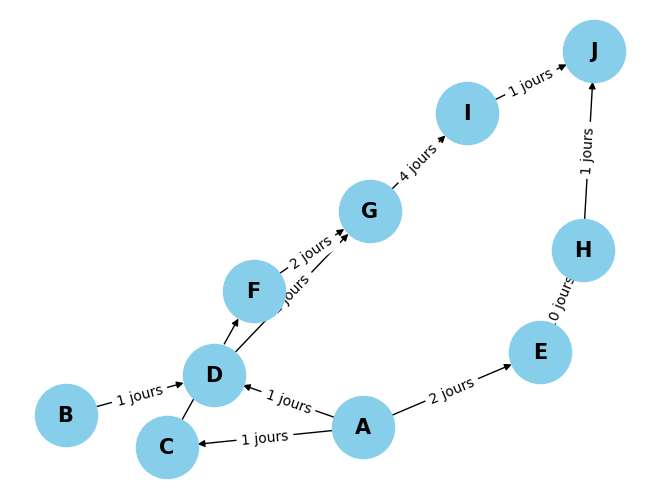

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Création du graphe PERT
G = nx.DiGraph()

# Ajout des tâches et des durées
tasks = {
    'A': 4, 'B': 2, 'C': 1, 'D': 1, 'E': 2, 'F': 2,
    'G': 2, 'H': 10, 'I': 4, 'J': 1
}

dependencies = {
    'A': [], 'B': [], 'C': ['A'], 'D': ['A', 'B'], 'E': ['A'],
    'F': ['C'], 'G': ['D', 'F'], 'H': ['E'], 'I': ['G'], 'J': ['H', 'I']
}

# Ajout des arcs
for task, preds in dependencies.items():
    for pred in preds:
        G.add_edge(pred, task, weight=tasks[task])

# Calcul des dates au plus tôt et au plus tard
pert_data = nx.algorithms.dag.dag_longest_path_length(G, weight='weight')

# Visualisation du graphe
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=15, font_weight='bold')
edge_labels = {(u, v): f'{tasks[v]} jours' for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()
